In [1]:
import pandas as pd

# Cargar CSV
df = pd.read_csv("estacion1.csv")  # <- reemplaza con tu ruta real

# Mostrar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Dimensiones del dataset
print("\nForma del dataset (filas, columnas):", df.shape)

# Nombre de las columnas
print("\nColumnas:", df.columns.tolist())


Primeras filas del dataset:


,id,estacion,sensor_name,sensor_dato,fecha
0,1,Estacion_01,Temp_CPU,51.1,2024-11-28 09:30:15
1,2,Estacion_01,Direccion del Viento,N,2024-11-28 09:30:15
2,3,Estacion_01,Radiacion UV,0.0,2024-11-28 09:30:15
3,4,Estacion_01,CO2,659.4,2024-11-28 09:30:15
4,5,Estacion_01,Anenometro,0.0,2024-11-28 09:30:15



Forma del dataset (filas, columnas): (485590, 5)

Columnas: ['id', 'estacion', 'sensor_name', 'sensor_dato', 'fecha']


In [2]:
# Revisar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Revisar si hay valores únicos esperados en sensor_name
print("\nSensores únicos detectados:")
print(df['sensor_name'].unique())

# Convertir columna 'fecha' a tipo datetime (si no lo está)
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

# Confirmar conversión
print("\nTipo de dato de 'fecha' después de convertir:")
print(df['fecha'].dtype)

# Verificar si hubo problemas en la conversión (valores nulos)
print("\nValores nulos en 'fecha':", df['fecha'].isnull().sum())



Tipos de datos:
id              int64
estacion       object
sensor_name    object
sensor_dato    object
fecha          object
dtype: object

Sensores únicos detectados:
['Temp_CPU' 'Direccion del Viento' 'Radiacion UV' 'CO2' 'Anenometro'
 'Lluvia' 'Particula 10um' 'Particulas 2.5um' 'Particulas 1um' 'Luz'
 'Temperatura' 'Humedad' 'Altitud' 'Presion']

Tipo de dato de 'fecha' después de convertir:
datetime64[ns]

Valores nulos en 'fecha': 0


In [3]:
# Ver cuántos tipos únicos hay por sensor (para ver si es categórico o no)
print("\nConteo de valores únicos por sensor:")
print(df.groupby("sensor_name")["sensor_dato"].nunique())

# Intentamos convertir a numérico (los errores se vuelven NaN)
df['sensor_valor'] = pd.to_numeric(df['sensor_dato'], errors='coerce')

# Ver cuántos se pudieron convertir a numérico
num_convertidos = df['sensor_valor'].notnull().sum()
total = len(df)
print(f"\nValores numéricos detectados: {num_convertidos} de {total} totales")



Conteo de valores únicos por sensor:
sensor_name
Altitud                  1348
Anenometro               1213
CO2                      5113
Direccion del Viento        8
Humedad                   940
Lluvia                   1008
Luz                     11571
Particula 10um           1379
Particulas 1um           1009
Particulas 2.5um         1051
Presion                   160
Radiacion UV             2458
Temp_CPU                   84
Temperatura               307
Name: sensor_dato, dtype: int64

Valores numéricos detectados: 450905 de 485590 totales


In [4]:
# Dataset de sensores numéricos
df_num = df[df['sensor_valor'].notnull()].copy()

# Dataset de sensores categóricos
df_cat = df[df['sensor_valor'].isnull()].copy()

# Verificación
print("Sensores numéricos:", df_num['sensor_name'].unique())
print("Sensores categóricos:", df_cat['sensor_name'].unique())


Sensores numéricos: ['Temp_CPU' 'Radiacion UV' 'CO2' 'Anenometro' 'Lluvia' 'Particula 10um'
 'Particulas 2.5um' 'Particulas 1um' 'Luz' 'Temperatura' 'Humedad'
 'Altitud' 'Presion']
Sensores categóricos: ['Direccion del Viento']


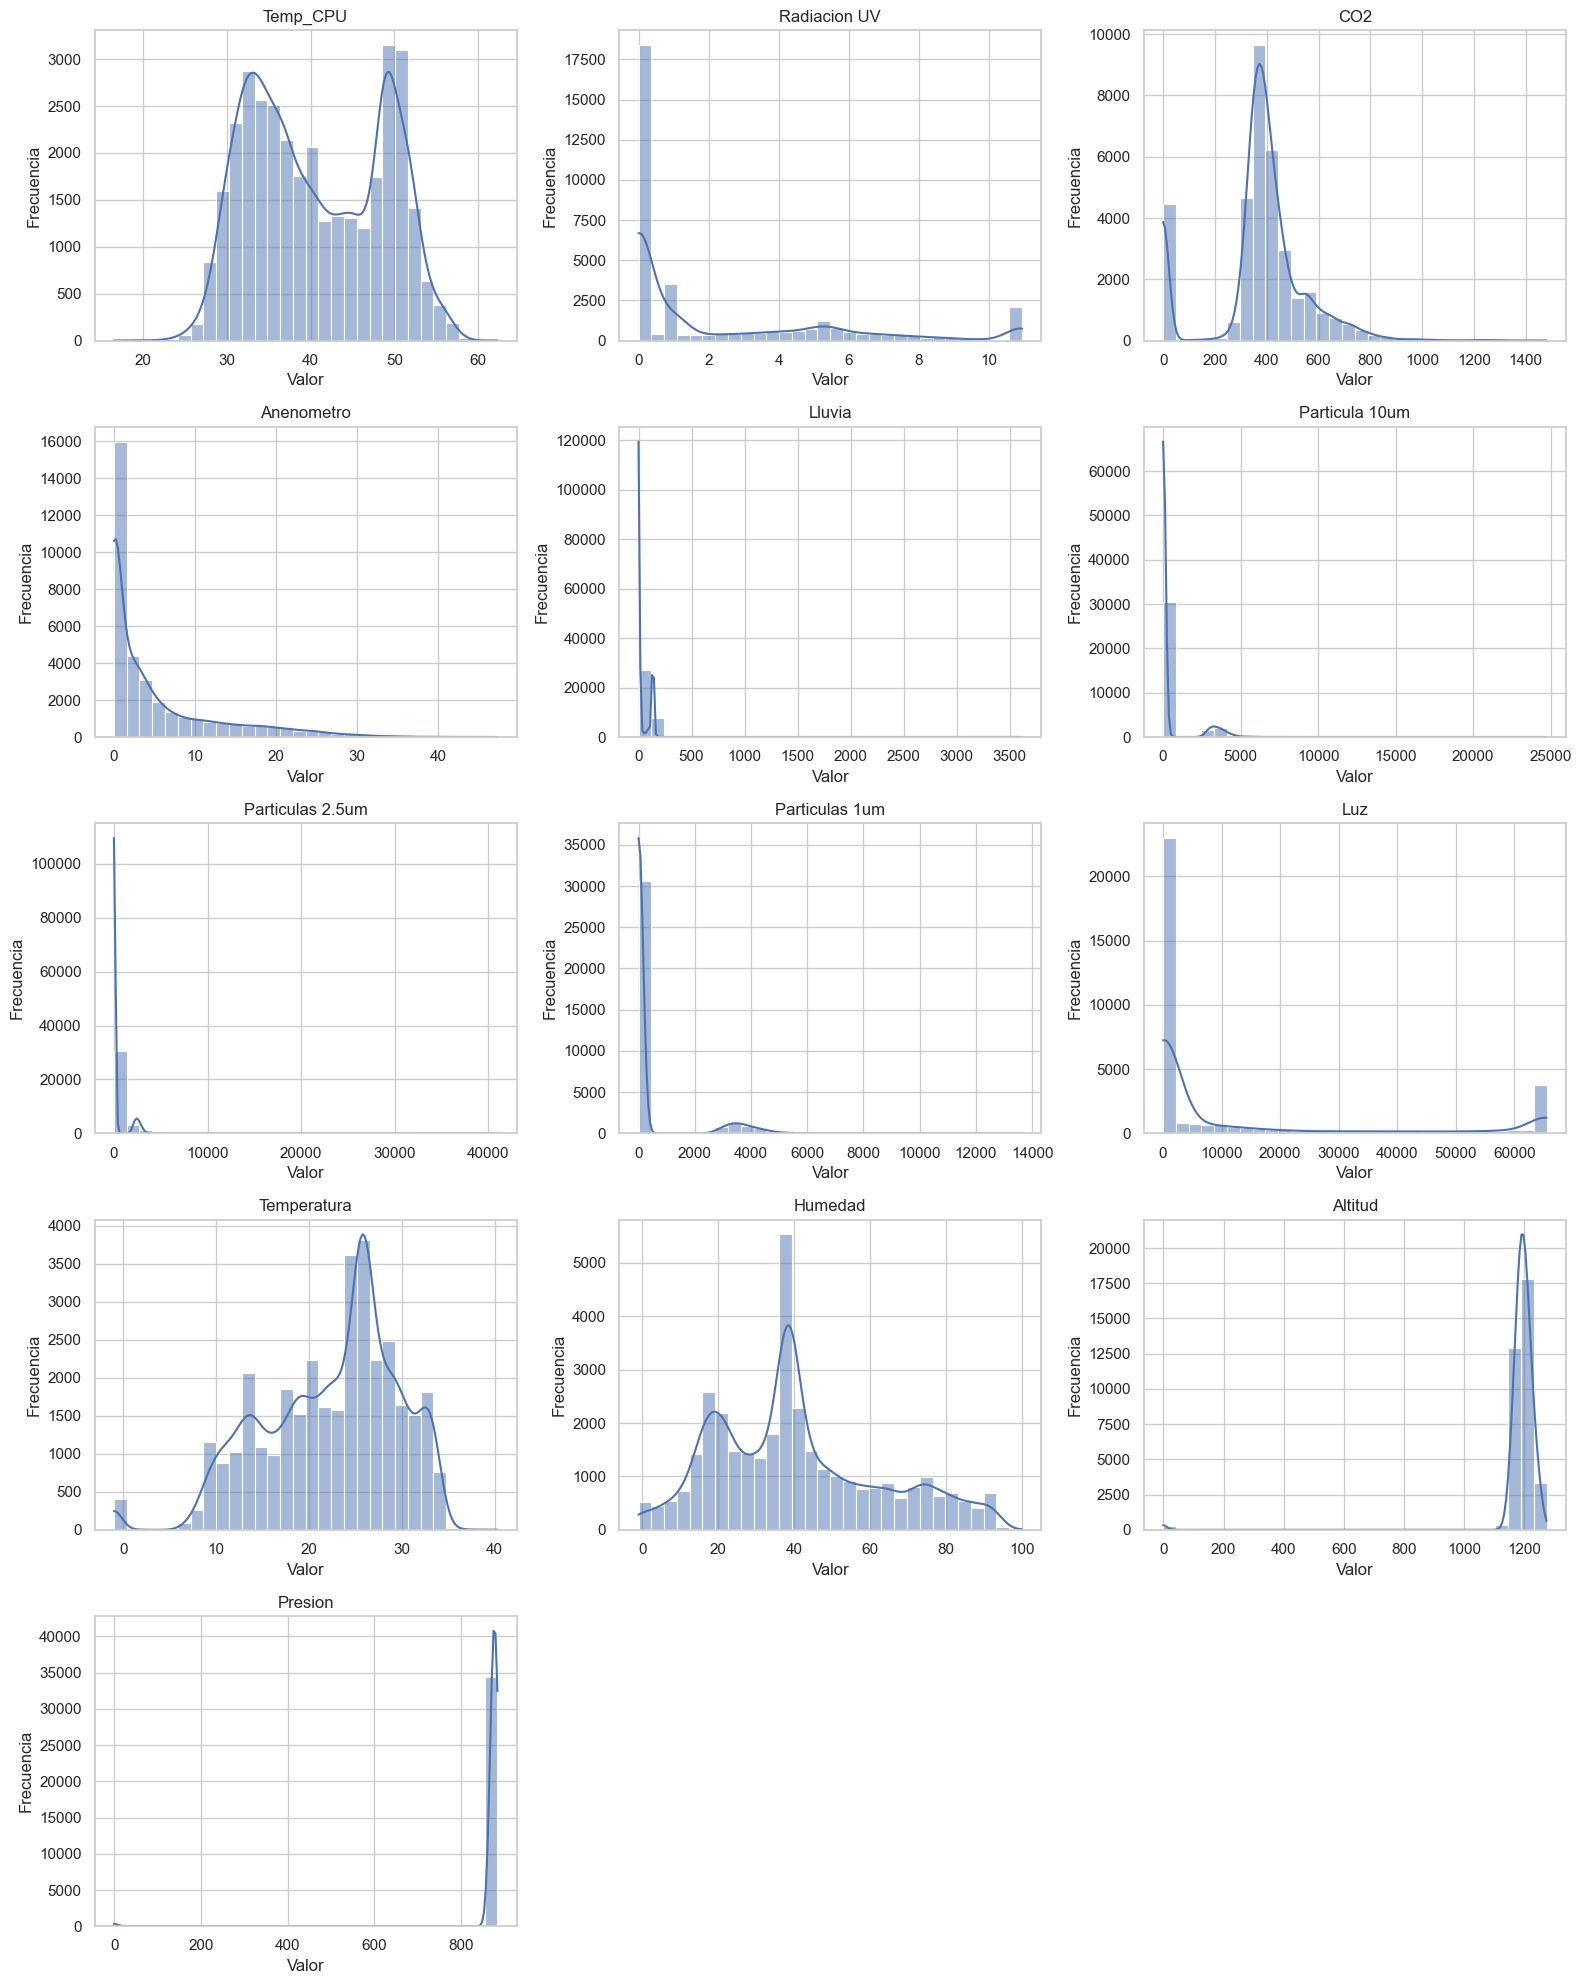

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# Obtenemos todos los sensores numéricos únicos
sensores_numericos = df_num['sensor_name'].unique()

# Graficamos histogramas
for i, sensor in enumerate(sensores_numericos, 1):
    plt.subplot((len(sensores_numericos) + 2) // 3, 3, i)
    sns.histplot(df_num[df_num['sensor_name'] == sensor]['sensor_valor'], bins=30, kde=True)
    plt.title(sensor)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


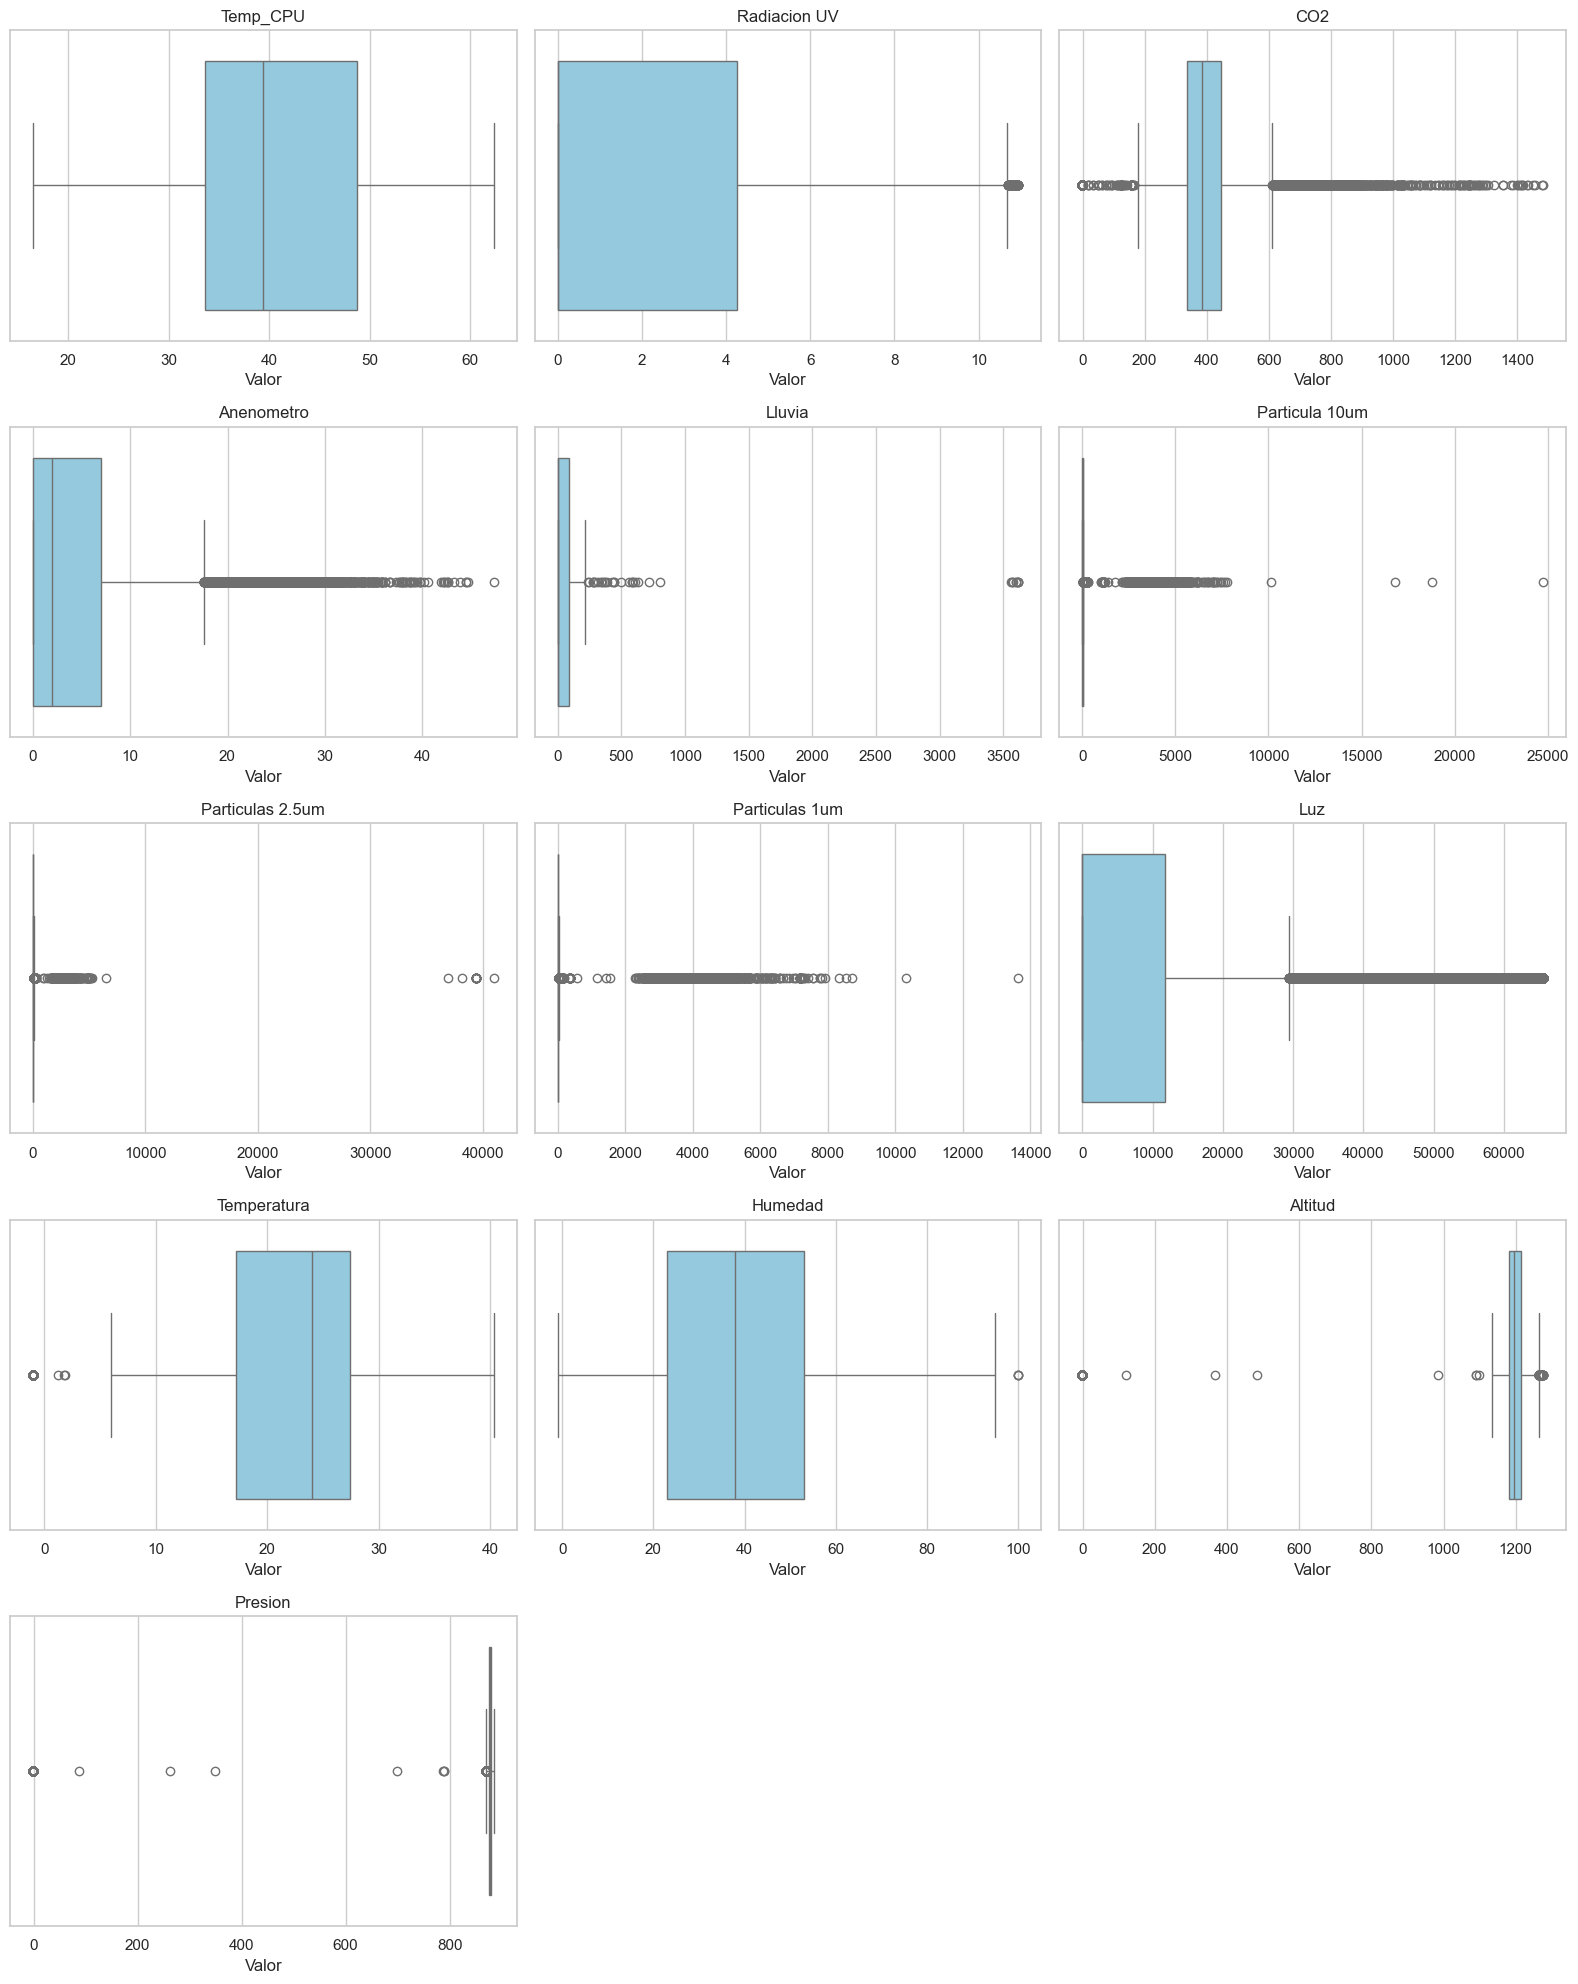

In [6]:
plt.figure(figsize=(16, 20))
for i, sensor in enumerate(sensores_numericos, 1):
    plt.subplot((len(sensores_numericos) + 2) // 3, 3, i)
    sns.boxplot(
        data=df_num[df_num["sensor_name"] == sensor],
        x="sensor_valor",
        orient="h",
        color='skyblue'
    )
    plt.title(sensor)
    plt.xlabel("Valor")

plt.tight_layout()
plt.show()
